<a href="https://colab.research.google.com/github/ElpoderdelComputo/SEI-Computo_aplicado/blob/main/Corr_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COLEGIO DE POSTGRADUADOS**

INSTITUCIÓN DE ENSEÑANZA E INVESTIGACIÓN EN CIENCIAS AGRÍCOLAS
CAMPUS MONTECILLO

POSGRADO EN SOCIOECONOMÍA, ESTADÍSTICA E INFORMÁTICA

# CÓMPUTO APLICADO

Ecualización por histograma

Autor: José Rodríguez Rosales


In [25]:
# Importar librerías
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.exposure import equalize_hist, equalize_adapthist

# Función para trazar una imagen
def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=40)
    plt.axis('off')
# Función para calcular valores máximos y mínimos 

def plot_hist(img):
    colors = ['r', 'g', 'b']
    cdf = np.zeros((256,3))
    for i in range(3):
        hist, bins = np.histogram(img[...,i].flatten(),256,[0,256], normed=True)
        cdf[...,i] = hist.cumsum()
        cdf_normalized = cdf[...,i] * hist.max() / cdf.max()
        plt.plot(cdf_normalized, color = colors[i], label='cdf ({})'.format(colors[i]))
        #plt.hist(img[...,i].flatten(),256,[0,256], color = colors[i], density=True)
        binWidth = bins[1] - bins[0]
        plt.bar(bins[:-1], hist*binWidth, binWidth, label='hist ({})'.format(colors[i]))
        plt.xlim([0,256])
    plt.legend(loc = 'upper left')
    return cdf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes nei

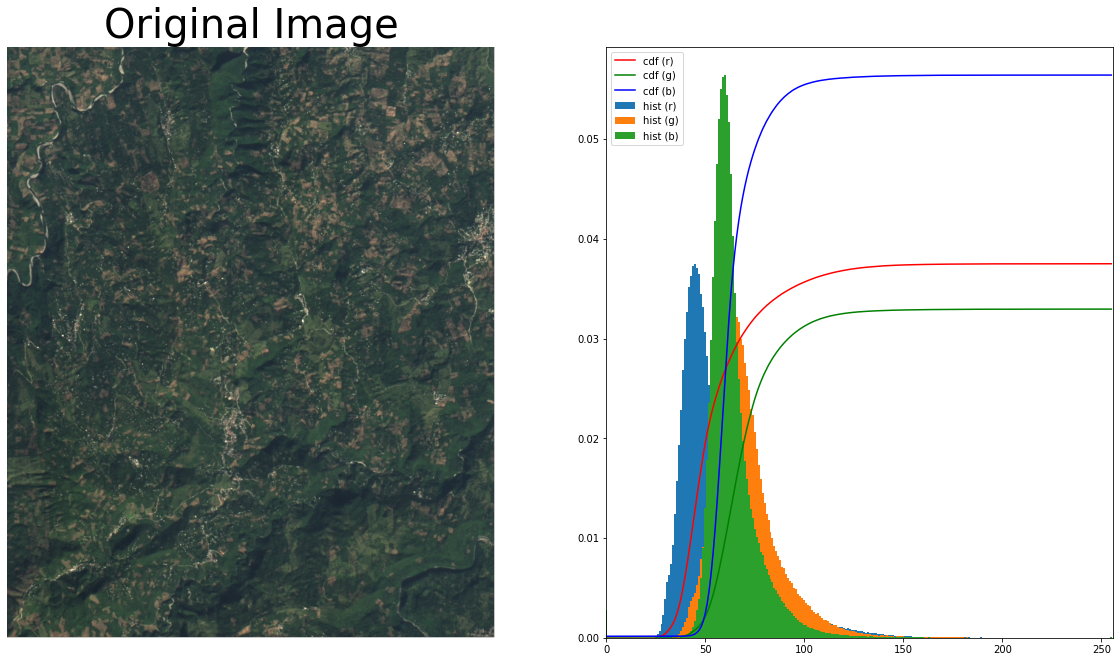

In [33]:
# Leer la imagen
img = imread('/content/huehue_dic_21.tif')

# Trazar la imagen
plt.figure(figsize=(20,50))
plt.subplot(421), plot_image(img, 'Original Image')
plt.subplot(422) 
cdf = plot_hist(img)

# Crea una copia de la imagen original
img2 = np.copy(img)


In [34]:
for i in range(3):
    cdf_m = np.ma.masked_equal(cdf[...,i],0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #cdf_m = 255 * cdf / cdf[-1] # normalize
    #print('Max:', cdf_m.max(),'Min: ', cdf_m.min())
    cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
    img2[...,i] = cdf2[img[...,i]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes nei

Adaptive Hist. Equalized (scikit-image)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes nei

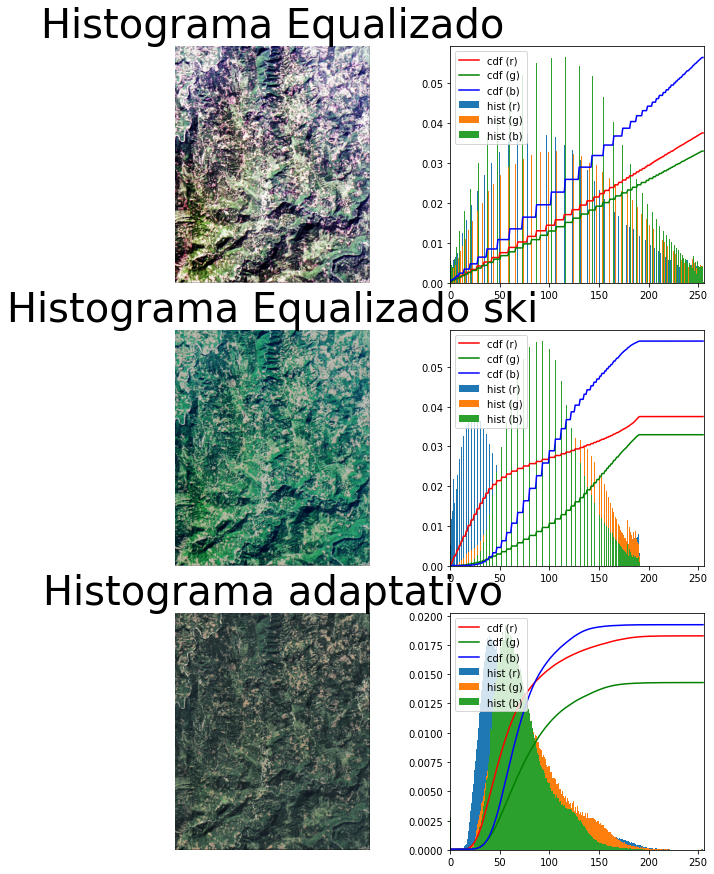

In [39]:
# Trazar el histograma
plt.figure(figsize=(10,20))
plt.subplot(423), plot_image(img2, 'Histograma Equalizado')
plt.subplot(424), plot_hist(img2)

# Trazar y guardar la imagen Ecualizada adaptativa
plt.imsave('Huehue_16_histequ.jpg', img2)
equ = (255*equalize_hist(img)).astype(np.uint8)
plt.subplot(425), plot_image(equ, 'Histograma Equalizado ski')
plt.subplot(426), plot_hist(equ)
plt.imsave('Huehue_16_heski.jpg', equ)

# Trazar y guardar la imagen Ecualizada adaptativa
equ = (255*equalize_adapthist(img)).astype(np.uint8)

print('Adaptive Hist. Equalized (scikit-image)')
#plt.subplot(427), plot_image(equ, 'Adaptive Hist. Equalized (scikit-image)')

plt.subplot(427), plot_image(equ, 'Histograma adaptativo')
plt.subplot(428), plot_hist(equ)
plt.imsave('corte2002_2.jpg', equ)

#plt.savefig('images/hist_out16.png', bbox_in='tight', pad_in=0)
# Trazar resultado final
plt.show()